In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams 

In [2]:
df = pd.read_csv(r'..\..\..\..\data\census\98-401-X2016066_English_CSV_data.csv')

In [3]:
#Filter 'DIM: Profile of Census Subdivisions (2247)' for 'Median total income in 2015 among recipients ($)'
df_rows_filtered = df.loc[df["DIM: Profile of Census Subdivisions (2247)"] == "Median total income in 2015 among recipients ($)"]
df_rows_filtered

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,GNR_LF,DATA_QUALITY_FLAG,CSD_TYPE_NAME,ALT_GEO_CODE,DIM: Profile of Census Subdivisions (2247),Member ID: Profile of Census Subdivisions (2247),Notes: Profile of Census Subdivisions (2247),Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
662,2016,3501005,1,South Glengarry,3.9,2.7,0,TP,3501005,Median total income in 2015 among recipients ($),663,NaN,36092.00,42837.00,30277.00
2909,2016,3501007,1,Akwesasne (Part) 59,34.1,22.4,3323,IRI,3501007,Median total income in 2015 among recipients ($),663,NaN,13744.00,7920.00,17088.00
5156,2016,3501011,1,South Stormont,3.2,5.9,0,TP,3501011,Median total income in 2015 among recipients ($),663,NaN,36414.00,43385.00,29828.00
7403,2016,3501012,1,Cornwall,4.2,4.0,0,CY,3501012,Median total income in 2015 among recipients ($),663,NaN,26644.00,30610.00,23889.00
9650,2016,3501020,1,South Dundas,4.3,7.0,0,MU,3501020,Median total income in 2015 among recipients ($),663,NaN,32117.00,38360.00,27317.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281452,2016,3560097,1,Muskrat Dam Lake,27.9,19.9,2313,IRI,3560097,Median total income in 2015 among recipients ($),663,NaN,20715.00,17984.00,21248.00
1283699,2016,3560098,1,Kingfisher Lake 1,22.5,24.3,2223,IRI,3560098,Median total income in 2015 among recipients ($),663,NaN,25664.00,20352.00,26464.00
1285946,2016,3560100,1,Wawakapewin (Long Dog Lake),NaN,NaN,9999,IRI,3560100,Median total income in 2015 among recipients ($),663,NaN,x,x,x
1288193,2016,3560102,1,McDowell Lake,NaN,NaN,9999,S-É,3560102,Median total income in 2015 among recipients ($),663,NaN,x,x,x


In [5]:
# filtering the resulting DataFrame for specific columns
df_cols_filtered = df_rows_filtered[['GEO_CODE (POR)', 'Dim: Sex (3): Member ID: [1]: Total - Sex']]
df_cols_filtered

,GEO_CODE (POR),Dim: Sex (3): Member ID: [1]: Total - Sex
662,3501005,36092.00
2909,3501007,13744.00
5156,3501011,36414.00
7403,3501012,26644.00
9650,3501020,32117.00
...,...,...
1281452,3560097,20715.00
1283699,3560098,25664.00
1285946,3560100,x
1288193,3560102,x


In [6]:
# Renaming the columns
df_renamed = df_cols_filtered.rename(
    columns = {
        "GEO_CODE (POR)" : "GEOCODE",
        "Dim: Sex (3): Member ID: [1]: Total - Sex" : "Median Income",
    }
)

df_renamed

,GEOCODE,Median Income
662,3501005,36092.00
2909,3501007,13744.00
5156,3501011,36414.00
7403,3501012,26644.00
9650,3501020,32117.00
...,...,...
1281452,3560097,20715.00
1283699,3560098,25664.00
1285946,3560100,x
1288193,3560102,x


In [10]:
# Make GEOCODE the index
df_index = df_renamed.set_index('GEOCODE')
df_index

,Median Income
GEOCODE,
3501005,36092.00
3501007,13744.00
3501011,36414.00
3501012,26644.00
3501020,32117.00
...,...
3560097,20715.00
3560098,25664.00
3560100,x


In [21]:
#Filter out rows where the Median Income column is “x”, “F”, or “..”
condition_1 = df_index['Median Income'] != 'x'
condition_2 = df_index['Median Income'] != 'F'
condition_3 = df_index['Median Income'] != '..'
df_filtered = df_index[condition_1 & condition_2 & condition_3]
df_filtered

,Median Income
GEOCODE,
3501005,36092.00
3501007,13744.00
3501011,36414.00
3501012,26644.00
3501020,32117.00
...,...
3560095,17920.00
3560096,17296.00
3560097,20715.00


In [25]:
# Use the pandas to_numeric method to convert the ‘Median Income’ column from strings (object) to numbers
df_filtered.loc[:, 'Median Income'] = pd.to_numeric(df_filtered['Median Income'])

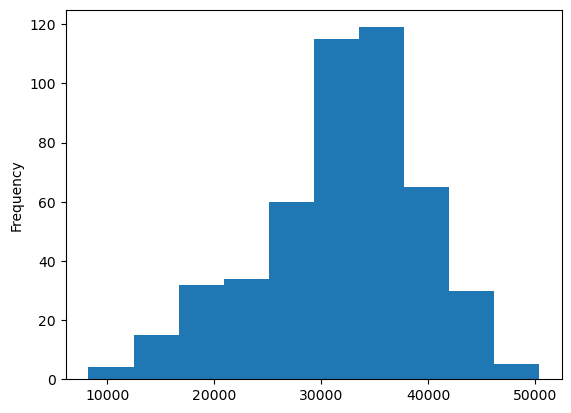

In [28]:
df_filtered['Median Income'].plot(kind = 'hist')
plt.show()

c:\Users\lizan\miniconda3\envs\gis4107\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lizan\miniconda3\envs\gis4107\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


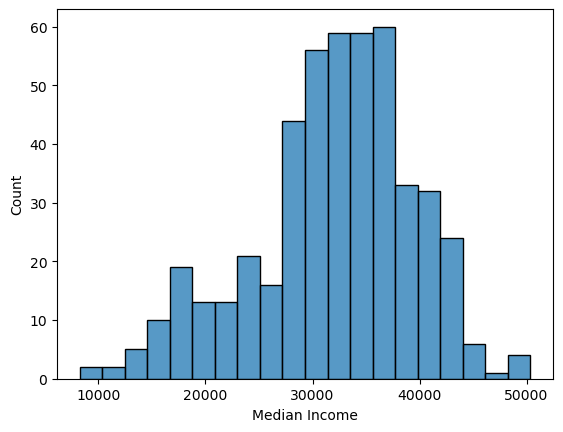

In [29]:
histo = sns.histplot(df_filtered['Median Income'])
plt.show()

In [30]:
fig = histo.get_figure()

In [ ]:
fig.savefig('test.png')